In [18]:
from os.path import join as jn

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
DATAFRAMES = jn("..", "..", "..", "results", "dataframes", "")
FIGURES = jn("..", "..", "..", "results", "figures", "")

In [20]:
df = pd.read_csv(jn(DATAFRAMES, "appendix_subsets", "dataframe_ex-size-effect.csv"))
print(df.columns)

Index(['system', 'N', 'theta', 'embedding', 'mu', 't1', 't2', 'prob',
       'accuracy', 'auroc', 'pr', 'intercept', 'coef_distances',
       'coef_degrees'],
      dtype='object')


In [21]:
THETAS = sorted(df["theta"].unique())

In [32]:
df.groupby(["N", "embedding", "theta"]).head()

,system,N,theta,embedding,mu,t1,t2,prob,accuracy,auroc,pr,intercept,coef_distances,coef_degrees,diff
0,LFR,1000,0.05,HOPE,0.1,2.1,1.0,1,0.662708,0.736060,0.739105,-0.031225,-25.367389,-10.543768,0.000000
1,LFR,1000,0.05,HOPE,0.1,2.1,1.0,1,0.662400,0.730066,0.741545,0.109325,-24.866849,-8.546107,-0.005994
2,LFR,1000,0.05,HOPE,0.1,2.1,1.0,1,0.652375,0.705139,0.684572,-0.010887,-15.293443,-10.771686,-0.024927
3,LFR,1000,0.05,HOPE,0.1,2.1,1.0,1,0.674892,0.743808,0.726931,-0.013127,-21.728969,-11.159825,0.038669
4,LFR,1000,0.10,HOPE,0.1,2.1,1.0,1,0.719355,0.790806,0.797614,0.042843,-18.161035,-8.219819,0.046998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,LFR,10000,0.95,N2V,0.1,2.1,1.0,1,0.937022,0.988351,0.984547,-0.065278,-12.247237,-2.201312,-0.000252
642,LFR,10000,0.95,N2V,0.1,2.1,1.0,1,0.948852,0.987688,0.975783,0.021722,-11.527054,-2.113178,-0.000663
643,LFR,10000,0.95,N2V,0.1,2.1,1.0,1,0.946068,0.990003,0.986422,-0.062792,-12.566269,-2.261648,0.002315
644,LFR,10000,0.95,N2V,0.1,2.1,1.0,1,0.951287,0.992259,0.988131,-0.019204,-12.180026,-2.317662,0.002257


In [22]:
df["diff"] = df.groupby(["N", "embedding"])["auroc"].diff().fillna(0)

In [27]:
df.query("embedding == 'LE'").head()

,system,N,theta,embedding,mu,t1,t2,prob,accuracy,auroc,pr,intercept,coef_distances,coef_degrees,diff
152,LFR,1000,0.05,LE,0.1,2.1,1.0,1,0.598705,0.682135,0.699904,0.000672,-24.429582,-13.398816,0.000000
153,LFR,1000,0.05,LE,0.1,2.1,1.0,1,0.623535,0.708270,0.723050,0.012871,-31.090916,-10.615912,0.026135
154,LFR,1000,0.05,LE,0.1,2.1,1.0,1,0.616749,0.700118,0.715420,0.016377,-30.459500,-12.243799,-0.008152
155,LFR,1000,0.05,LE,0.1,2.1,1.0,1,0.614898,0.696048,0.719452,-0.023967,-30.275646,-12.656363,-0.004070
156,LFR,1000,0.10,LE,0.1,2.1,1.0,1,0.674263,0.766474,0.776757,-0.019458,-25.981484,-9.640830,0.070426


<Figure size 640x480 with 0 Axes>

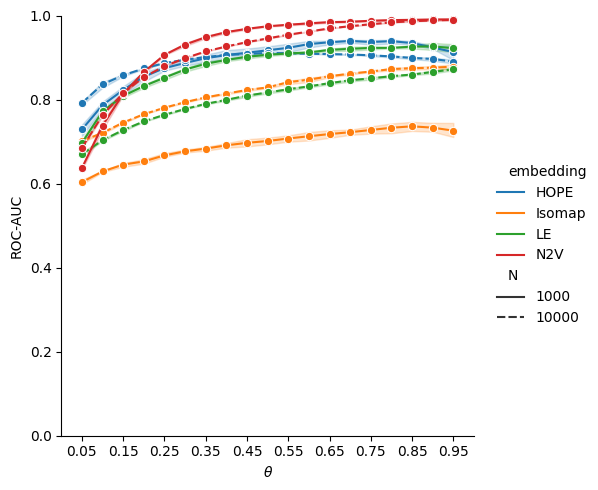

In [25]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="embedding",
    style="N",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', 'ROC-AUC')
g.set(
    xlim=(0,1), xticks=THETAS[::2],
    ylim=(0, 1),
)
g.tick_params(axis="x", labelrotation=00)
g.tick_params(axis="y", which="minor")

# Adjust subplots
# g.set_titles(col_template="{col_name} duplexes")
# g.fig.subplots_adjust(top=0.9)

# Adjust figure
# g.fig.suptitle("Relative impact of embedding feature")
# sns.move_legend(g,
#     loc="upper right", bbox_to_anchor=(0.85, 0.8),
#     title="Embedding",
#     ncol=2,
#     frameon=True)

# Save to disk
g.tight_layout()
# g.savefig(
#     os.path.join(FIGURES, "figure_coef-pfi_hue-embedding_col-ex_data-ex01-thru-ex05.png"),
#     transparent=False,
#     facecolor="white",
#     dpi=600)

In [39]:
diffs = dict()
for emb in ["N2V", "LE", "Isomap", "HOPE"]:
    df_ = df.query("embedding == @emb")
    diff = df_.query("N == 10000").groupby("theta")["auroc"].mean() - df_.query("N == 1000").groupby("theta")["auroc"].mean()
    diffs[emb] = diff

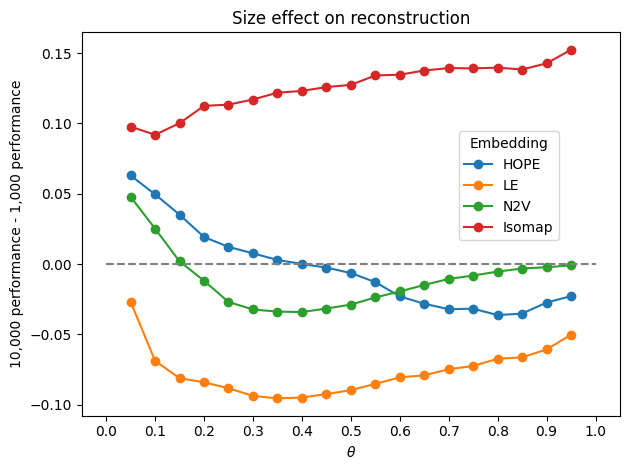

In [50]:
plt.figure()

plt.plot(
    THETAS, diffs["HOPE"],
    label="HOPE",
    marker="o"
)
plt.plot(
    THETAS, diffs["LE"],
    label="LE",
    marker="o"
)
plt.plot(
    THETAS, diffs["N2V"],
    label="N2V",
    marker="o"
)
plt.plot(
    THETAS, diffs["Isomap"],
    label="Isomap",
    marker="o"
)
plt.hlines(0, 0, 1, linestyles="--", colors="gray")

plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(r"$\theta$")
plt.ylabel("10,000 performance - 1,000 performance")


plt.legend(
    title="Embedding",
    loc="center right", bbox_to_anchor=(0.9, 0.6))
plt.title("Size effect on reconstruction")
plt.tight_layout()
plt.savefig(
    jn(FIGURES, "figure_perfchange-theta_hue-embedding_data-LFR-1k-10k.png"),
    facecolor="white",
    transparent=False,
    dpi=600)